In [1]:
from datetime import datetime
import importlib

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import ortho_group

In [2]:
from minmax import algos, probs, utils
importlib.reload(algos)
importlib.reload(probs)
importlib.reload(utils)

%matplotlib inline

# Qudratic Bi-SC-SC Problem: primal-dual gap vs iteration (k)

In [3]:
d = 5
eigvals = np.ones([d])*(2.0**np.arange(0,d, 1))

A = ortho_group.rvs(dim=d).dot(np.diag(eigvals).dot(ortho_group.rvs(dim=d)))
B = ortho_group.rvs(dim=d).dot(np.diag(eigvals**1).dot(ortho_group.rvs(dim=d)))
B = B.T.dot(B)
C = ortho_group.rvs(dim=d).dot(np.diag(eigvals**1).dot(ortho_group.rvs(dim=d)))
C = C.T.dot(C)

D = 10.0

proj_x = None
proj_y = None

x_0 = np.random.randn(d)
y_0 = np.random.randn(d)

prob = probs.QuadraticSeparableMinimaxProb(
    A=A, B=B, C=C, b=None, c=None, 
    proj_x=proj_x, proj_y=proj_y)

K = 1000

output_pd = algos.primalDualSeparable_optimize(
  prob, K=K, z_0=(x_0, y_0), stepsize=None,
  log_freq=1, log_prefix='PD', print_freq=10000)

output_mp = algos.MirrorProx_optimize(
  prob, K=K, z_0=(x_0, y_0),
  strongly_monotone=True,
  log_freq=1, log_prefix='MP', print_freq=10000)

output_mpbal = algos.MirrorProx_optimize(
  prob, K=K, z_0=(x_0, y_0),
  strongly_monotone=True, balance=True,
  log_freq=1, log_prefix='MP_Bal', print_freq=10000)

kappa_rellip = prob.Ly/prob.mux + prob.Lxy/((prob.mux*prob.muy)**0.5) + prob.Ly/prob.muy
output_mp_rellip = algos.RelLipMirrorProxSM_optimize(
  prob, K=K, z_0=(x_0, y_0),
  log_freq=1, log_prefix='MP_RL', print_freq=10000)

PDk=0,x_k=[-0.36261752 -0.63387632 -1.56767652],y_k=[ 0.6845113   0.22351034 -0.46469553];gap=1.8e+02,|grad|=2.3e+02,func=5.6,dist_sq=8;
MPk=0,x_k=[-0.36261752 -0.63387632 -1.56767652],y_k=[ 0.6845113   0.22351034 -0.46469553];gap=1.8e+02,|grad|=2.3e+02,func=5.6,dist_sq=8;avg:gap=1.8e+02,|grad|=2.3e+02,func=5.6,dist_sq=8;tgap=1.4e+02,|grad|=1.8e+02,func=6.3,dist_sq=7.5;tavg:gap=1.4e+02,|grad|=1.8e+02,func=6.3,dist_sq=7.5
MP_Balk=0,x_k=[-0.36261752 -0.63387632 -1.56767652],y_k=[ 0.6845113   0.22351034 -0.46469553];gap=1.8e+02,|grad|=2.3e+02,func=5.6,dist_sq=8;avg:gap=1.8e+02,|grad|=2.3e+02,func=5.6,dist_sq=8;tgap=1.6e+02,|grad|=2.1e+02,func=6,dist_sq=7.7;tavg:gap=1.6e+02,|grad|=2.1e+02,func=6,dist_sq=7.7
MP_RLk=0,x_k=[-0.36261752 -0.63387632 -1.56767652],y_k=[ 0.6845113   0.22351034 -0.46469553];gap=1.8e+02,|grad|=2.3e+02,func=5.6,dist_sq=8;avg:gap=1.8e+02,|grad|=2.3e+02,func=5.6,dist_sq=8;tgap=1.1e+02,|grad|=1.3e+02,func=6.4,dist_sq=7.1;tavg:gap=1.1e+02,|grad|=1.3e+02,func=6.4,dist_sq=

Lxy=16.000000000000004, Lx=256.0, Ly=255.99999999999994, mux=0.999999999999981, muy=0.9999999999999879, sqrt(mux*muy)=0.9999999999999845, kappa_opt=47.937438845343124, kappa_mp=526.0000000000082, kappa_rellip=526.0000000000082


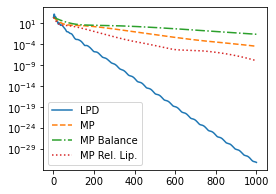

In [145]:
plt.semilogy(output_pd['k_list'], output_pd['gap'], '-', label='LPD')
plt.semilogy(output_mp['k_list'], output_mp['gap'], '--', label='MP')
plt.semilogy(output_mpbal['k_list'], output_mpbal['gap'], '-.', label='MP Balance')
plt.semilogy(output_mp_rellip['k_list'], output_mp_rellip['gap'], ':', label='MP Rel. Lip.')

kappa_opt = (
  ((prob.Lx-prob.mux)/prob.mux)**0.5 +
  prob.Lxy/((prob.mux*prob.muy)**0.5) +
  ((prob.Ly-prob.muy)/prob.muy)**0.5
)
kappa_mp = (
  ((prob.Lx-prob.mux)/prob.mux) +
  prob.Lxy/min(prob.mux,prob.muy) +
  ((prob.Ly-prob.muy)/prob.muy)
)
kappa_rellip = (
  ((prob.Lx-prob.mux)/prob.mux) +
  prob.Lxy/((prob.mux*prob.muy)**0.5) +
  ((prob.Ly-prob.muy)/prob.muy)
)

print(f'Lxy={prob.Lxy}, Lx={prob.Lx}, Ly={prob.Ly}, ' 
      f'mux={prob.mux}, muy={prob.muy}, ' 
      f'sqrt(mux*muy)={(prob.mux*prob.muy)**0.5}, '
      f'kappa_opt={kappa_opt}, kappa_mp={kappa_mp}, kappa_rellip={kappa_rellip}')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(4, 3)

plt.legend()
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
plotname = f'synthetic_vs_k_{timestamp}'
plt.savefig(f'{plotname}.pdf', bbox_inches='tight')
plt.savefig(f'{plotname}.png', bbox_inches='tight')
plt.show()
plt.close()

# Qudratic Bi-SC-SC Problem: varying condition number (\kappa)

In [5]:
d = 5

metric_key = 'dist_sq'
metric_lists = {
  'kappa_x': [],
  'pd': [],
  'mp': [],
  'mp_bal': [],
  'mp_rel': [],
  'initial': [],
}

for _ in range(5):
  for key in metric_lists:
    metric_lists[key].append([])

  for ratio in np.arange(1.25, 2.25+0.25, 0.25):
    eigvals = np.ones([d])*(ratio**np.arange(0,d, 1))

    A = ortho_group.rvs(dim=d).dot(np.diag(eigvals).dot(ortho_group.rvs(dim=d)))
    B = ortho_group.rvs(dim=d).dot(np.diag(eigvals**1).dot(ortho_group.rvs(dim=d)))
    B = B.T.dot(B)
    C = ortho_group.rvs(dim=d).dot(np.diag(eigvals**1).dot(ortho_group.rvs(dim=d)))
    C = C.T.dot(C)

    D = 10.0

    proj_x = None
    proj_y = None

    x_0 = np.random.randn(d)
    y_0 = np.random.randn(d)

    prob = probs.QuadraticSeparableMinimaxProb(
        A=A, B=B, C=C, b=None, c=None, 
        proj_x=proj_x, proj_y=proj_y)
    metric_lists['kappa_x'][-1].append(prob.Lx/prob.mux)

    K = 1000

    output_pd = algos.primalDualSeparable_optimize(
      prob, K=K, z_0=(x_0, y_0), stepsize=None,
      log_freq=1, log_prefix='PD', print_freq=10000)
    metric_lists['initial'][-1].append(output_pd[metric_key][0])
    metric_lists['pd'][-1].append(output_pd[metric_key][-1])

    output_mp = algos.MirrorProx_optimize(
      prob, K=K, z_0=(x_0, y_0),
      strongly_monotone=True,
      log_freq=1, log_prefix='MP', print_freq=10000)
    metric_lists['mp'][-1].append(output_mp[metric_key][-1])

    output_mpbal = algos.MirrorProx_optimize(
      prob, K=K, z_0=(x_0, y_0),
      strongly_monotone=True, balance=True,
      log_freq=1, log_prefix='MP_Bal', print_freq=10000)
    metric_lists['mp_bal'][-1].append(output_mpbal[metric_key][-1])


    kappa_rellip = prob.Ly/prob.mux + prob.Lxy/((prob.mux*prob.muy)**0.5) + prob.Ly/prob.muy
    output_mp_rellip = algos.RelLipMirrorProxSM_optimize(
      prob, K=K, z_0=(x_0, y_0),
      log_freq=1, log_prefix='MP_RL', print_freq=10000)
    metric_lists['mp_rel'][-1].append(output_mp_rellip[metric_key][-1])

for key in metric_lists:
  metric_lists[key] = np.array(metric_lists[key])
metric_lists['kappa_x'] = metric_lists['kappa_x'].mean(axis=0)

PDk=0,x_k=[ 0.17460651 -1.57200347  1.49531162],y_k=[ 0.50678716  1.58179085 -0.07796468];gap=21,|grad|=16,func=-11,dist_sq=10;
MPk=0,x_k=[ 0.17460651 -1.57200347  1.49531162],y_k=[ 0.50678716  1.58179085 -0.07796468];gap=21,|grad|=16,func=-11,dist_sq=10;avg:gap=21,|grad|=16,func=-11,dist_sq=10;tgap=13,|grad|=13,func=-5.8,dist_sq=6.8;tavg:gap=13,|grad|=13,func=-5.8,dist_sq=6.8
MP_Balk=0,x_k=[ 0.17460651 -1.57200347  1.49531162],y_k=[ 0.50678716  1.58179085 -0.07796468];gap=21,|grad|=16,func=-11,dist_sq=10;avg:gap=21,|grad|=16,func=-11,dist_sq=10;tgap=18,|grad|=15,func=-8.5,dist_sq=8.6;tavg:gap=18,|grad|=15,func=-8.5,dist_sq=8.6
MP_RLk=0,x_k=[ 0.17460651 -1.57200347  1.49531162],y_k=[ 0.50678716  1.58179085 -0.07796468];gap=21,|grad|=16,func=-11,dist_sq=10;avg:gap=21,|grad|=16,func=-11,dist_sq=10;tgap=8.9,|grad|=10,func=-3.3,dist_sq=5.1;tavg:gap=8.9,|grad|=10,func=-3.3,dist_sq=5.1
PDk=0,x_k=[-0.43814218  0.70946208  0.67665046],y_k=[0.5330863  0.01968297 0.44906129];gap= 9,|grad|=18,fun

kappa_x [  5.96046448  25.62890625  87.96388245 256.         656.84083557]
sqrt(kappa_x) [ 2.44140625  5.0625      9.37890625 16.         25.62890625]


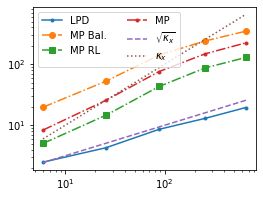

In [151]:
plt.loglog(metric_lists['kappa_x'], K/np.log(metric_lists['initial']/metric_lists['pd']).mean(axis=0), '.-', label='LPD')
plt.loglog(metric_lists['kappa_x'], K/np.log(metric_lists['initial']/metric_lists['mp_bal']).mean(axis=0), 'o-.', label='MP Bal.')
plt.loglog(metric_lists['kappa_x'], K/np.log(metric_lists['initial']/metric_lists['mp_rel']).mean(axis=0), 's-.', label='MP RL' )
plt.loglog(metric_lists['kappa_x'], K/np.log(metric_lists['initial']/metric_lists['mp']).mean(axis=0), '.-.', label='MP')

plt.loglog(metric_lists['kappa_x'], metric_lists['kappa_x']**0.5, '--', label=r'$\sqrt{\kappa_x}$')
plt.loglog(metric_lists['kappa_x'], metric_lists['kappa_x'], ':', label='$\kappa_x$')

print('kappa_x', metric_lists['kappa_x'])
print('sqrt(kappa_x)', metric_lists['kappa_x']**0.5)

fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(5, 5)
fig.set_size_inches(4, 3)

plt.legend(ncol=2)
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
plotname = f'synthetic_vs_kappa_{timestamp}'
plt.savefig(f'{plotname}.pdf', bbox_inches='tight')
plt.savefig(f'{plotname}.png', bbox_inches='tight')
plt.show()
plt.close()